# การตรวจหาเนื้องอกในสมองจากภาพ MRI

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N5.jpg
/kaggle/input/brain-mri-images-for-b

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization
import warnings
warnings.filterwarnings('ignore')

2021-10-07 04:39:51.488473: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
path = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset'

In [4]:
img_data  = ImageDataGenerator(rescale=1/255)

**ปรับขนาดรูปภาพ**

In [5]:
img_data.flow_from_directory(path)

Found 253 images belonging to 2 classes.


**มีรูปภาพจำนวน 253 ของภาพเนื้องอกในสมอง(YES) และภาพสมองปกติ(NO)**

In [6]:
data_gen = img_data.flow_from_directory(path , target_size=(256,256) , batch_size=253)

Found 253 images belonging to 2 classes.


In [7]:
features , target = data_gen.next()

In [8]:
features.shape

(253, 256, 256, 3)

In [9]:
target.shape

(253, 2)

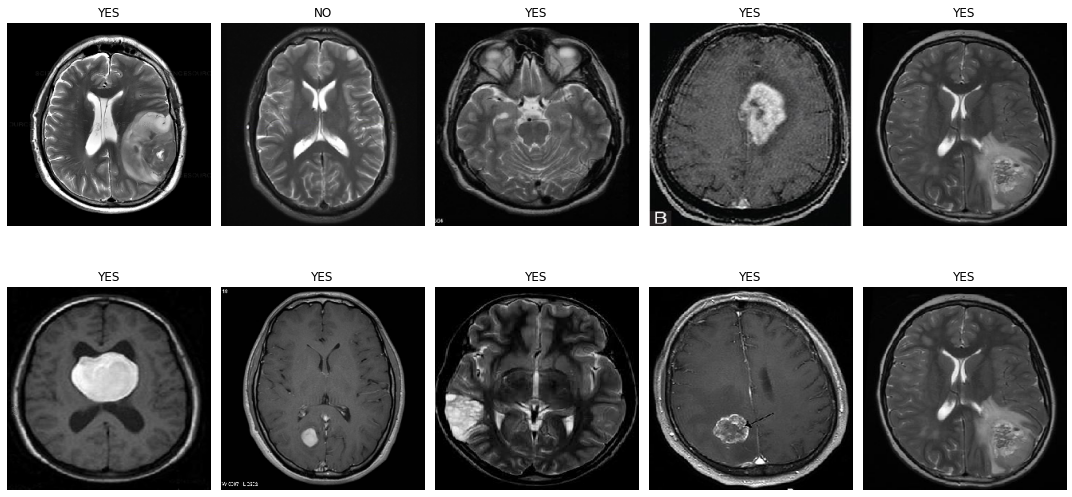

In [10]:
fig , ax = plt.subplots(2,5 , figsize=(15,8))
ax = ax.ravel()
for index , i in enumerate(np.random.randint(1, features.shape[0] , 10)) :
    ax[index].imshow(features[i])
    ax[index].set_title('NO' if target[i][0] == 1 else 'YES')
    ax[index].axis('off')
plt.tight_layout()

**ภาพ MRI ของเนื้องอกในสมอง NO=ไม่มี , YES=มี**

In [11]:
base_model = keras.applications.VGG16(input_shape=(256,256,3) , include_top=False , weights='imagenet')

2021-10-07 04:39:59.345782: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-07 04:39:59.349257: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-07 04:39:59.388135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-07 04:39:59.388780: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-07 04:39:59.388842: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-07 04:39:59.414555: I tensorflow/stream_executor/platform/def

58892288/58889256 [==============================] - 0s 0us/step


In [12]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

**ข้อมูล VGG16**

In [13]:
base_model.trainable

True

In [14]:
base_model.trainable = False

**ปิด trainable ให้โมเดลทำงานแค่ส่วนที่กำหนด**

In [15]:
layer_1 = Dropout(0.3)(base_model.output)
layer_2 = Flatten()(layer_1)
layer_3 = Dropout(0.5)(layer_2)
layer_output = Dense(2 , activation='softmax')(layer_3)

**นำ ayer ไปต่อ VGG16**

In [16]:
model_tf = keras.Model(base_model.input , layer_output)

**กำหนด input output ของโมเดล**

In [17]:
model_tf.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [18]:
model_tf.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001) , loss='categorical_crossentropy' , metrics=['accuracy'])

In [19]:
model_tf_history = model_tf.fit(features , target , validation_split=0.2 , epochs=20)

2021-10-07 04:40:03.061560: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-07 04:40:03.072382: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000134999 Hz


Epoch 1/20


2021-10-07 04:40:03.702650: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-07 04:40:04.478084: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-07 04:40:04.506773: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


7/7 [==============================] - 15s 781ms/step - loss: 1.0301 - accuracy: 0.4832 - val_loss: 0.7071 - val_accuracy: 0.5882
Epoch 2/20
7/7 [==============================] - 1s 106ms/step - loss: 0.7385 - accuracy: 0.6294 - val_loss: 0.6001 - val_accuracy: 0.7843
Epoch 3/20
7/7 [==============================] - 1s 103ms/step - loss: 0.5796 - accuracy: 0.7189 - val_loss: 0.5663 - val_accuracy: 0.7843
Epoch 4/20
7/7 [==============================] - 1s 101ms/step - loss: 0.6082 - accuracy: 0.6951 - val_loss: 0.5751 - val_accuracy: 0.8039
Epoch 5/20
7/7 [==============================] - 1s 99ms/step - loss: 0.5033 - accuracy: 0.7507 - val_loss: 0.6411 - val_accuracy: 0.7843
Epoch 6/20
7/7 [==============================] - 1s 100ms/step - loss: 0.5432 - accuracy: 0.7876 - val_loss: 0.5675 - val_accuracy: 0.8039
Epoch 7/20
7/7 [==============================] - 1s 101ms/step - loss: 0.5240 - accuracy: 0.7537 - val_loss: 0.5524 - val_accuracy: 0.8039
Epoch 8/20
7/7 [===============

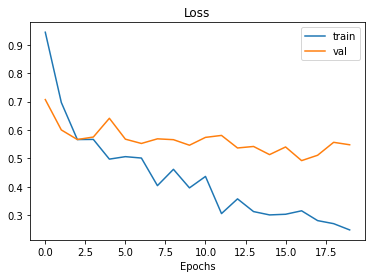

In [20]:
plt.plot(model_tf_history.history['loss'] , label='train')
plt.plot(model_tf_history.history['val_loss'], label='val')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

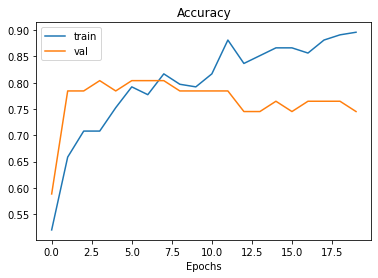

In [21]:
plt.plot(model_tf_history.history['accuracy'] , label='train')
plt.plot(model_tf_history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()